<h1 style='text-align:center'><strong>Automatic License Plate Recognition</strong></h1>

Dataset <a href="https://ai.stanford.edu/~jkrause/cars/car_dataset.html">Stanford Cars</a><br>
<i>"The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe"</i>

<a id="section_n" name="section_n"></a>

## Table of Contents

* [1. Pre-Processing](#chapter2)
    * [Data Preparation](#section_2_1)
    * [Sample Histogram Equalization](#section_2_2)
    * [Random Image Sample](#section_2_3)
* [2. License Plate Localization](#chapter3)
    * [Choosing A Random Image](#section_3_1)
    * [Stepwise License Plate Detection](#section_3_2)
    * [License Plate Detected Image](#section_3_3)
* [3. Optimal Character Recognition](#chapter4)
    * [Recognize Text of License Plate](#section_4_1)
* [4. Generalized License Plate Detection](#chapter5)
    * [Sample Detection](#section_5_1)
* [5. Conclusion](#chapter6)

<a id="chapter2" name="chapter2"></a> 

<h2 style="text-align:center">Pre-Processing</h2>

In [1]:
#============================ Personal Helper Modules
import engine.environment as en
import engine.license_detection as ld

#============================ Libraries
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
import imutils
import warnings
import pytesseract
import numpy as np
from IPython.display import clear_output
%matplotlib inline 
warnings.filterwarnings('ignore')
import random

In [2]:
path = "testing/{}"
image_prefix = "Cars{}.{}"
min_aspect_ratio = 2;max_aspect_ratio = 8
path_name=path.format(image_prefix)

<a id="section_2_1" name="section_2_1"></a>

<h4 style="color:#287837"><strong>Data Preparation</strong></h4>

> Read dataset 

> Discover images

> Display random sample of images

In [3]:
images = en.read_images(path_name)
np.random.shuffle(images)

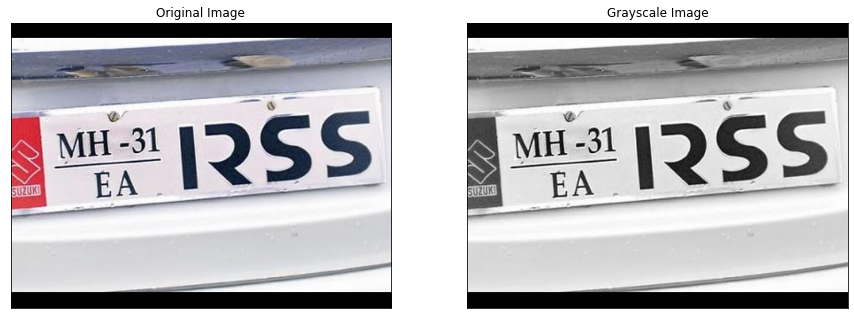

In [4]:
rand = random.randint(0,len(images))
img = images[rand]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
en.plot_images(img,gray,title1="Original Image",title2="Grayscale Image")

<a id="section_2_2" name="section_2_2"></a>

<h4 style="color:#287837"><strong>Sample Histogram Equalization</strong></h4>

> Plot the intensity counts of the image

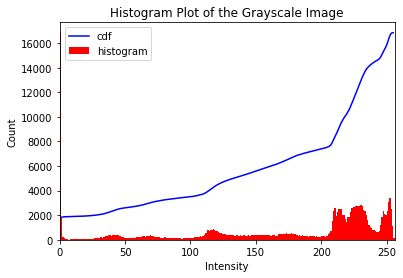

In [5]:
cdf_normalized = en.create_image_histogram(gray)
en.plot_histogram(gray,cdf_normalized)

> Demonstration of how histogram equalization can help brighten the image for license plate detection

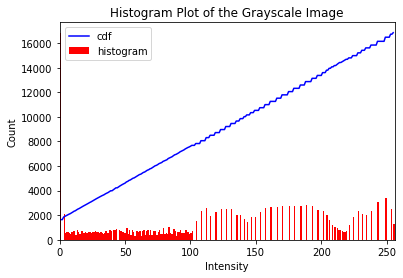

In [6]:
hist = en.hist_eq_(gray).astype('uint8')
cdf_normalized = en.create_image_histogram(hist)
en.plot_histogram(hist,cdf_normalized)

<a id="section_2_3" name="section_2_3"></a>

<h4 style="color:#287837"><strong>Random Image Sample</strong></h4>

> Display the various cars available in the dataset

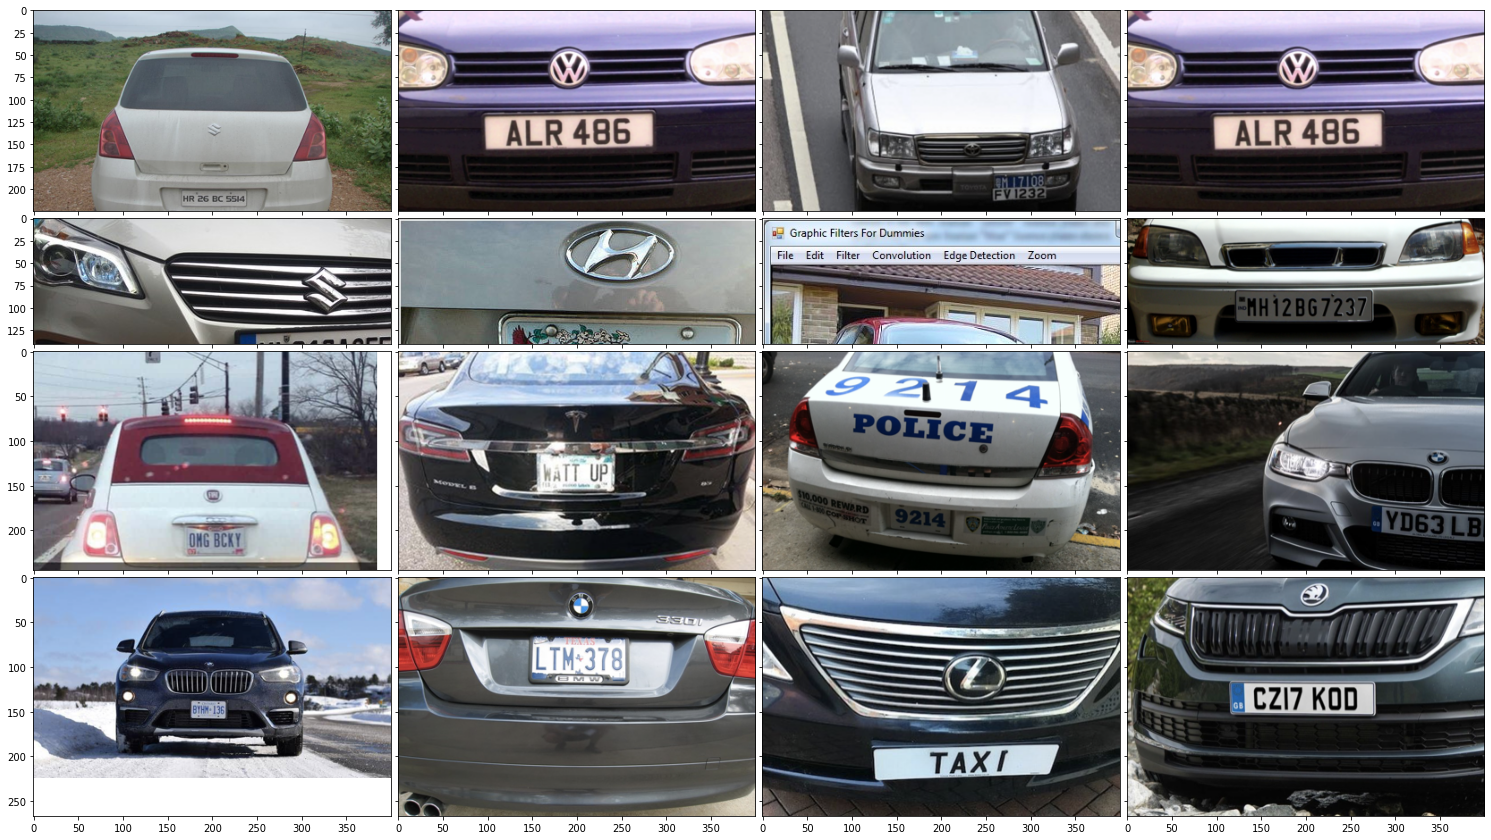

In [7]:
en.image_random_sample(images)

<a id="chapter3" name="chapter3"></a> 

<h2 style="text-align:center">License Plate Localization</h2>

<a id="section_3_1" name="section_3_1"></a>

<h4 style="color:#287837"><strong>Choosing A Random Image</strong></h4>

> Demonstrate how the algorithm works on a sample image (Draw the image multiple times)

> In some instances, there may be some noise

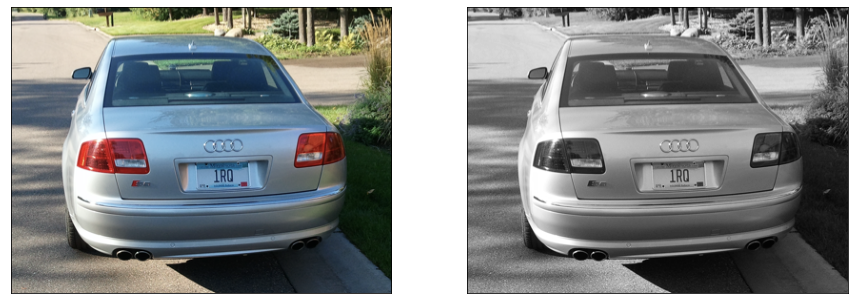

In [8]:
rand = random.randint(0,len(images))
img = images[rand]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
en.plot_images(img,gray)

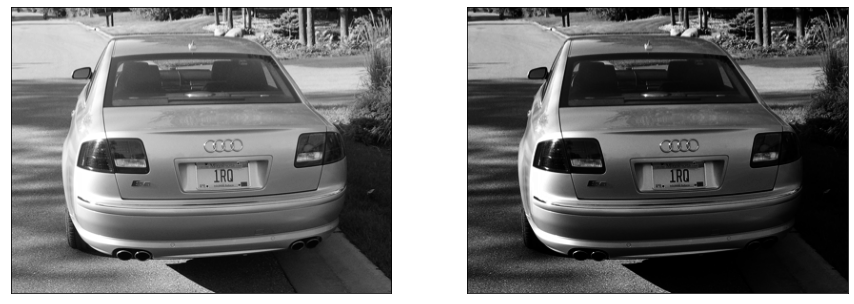

In [9]:
gamma = 0.5
adjusted_gray = en.adjust_gamma(gray, gamma=gamma)
en.plot_images(gray,adjusted_gray)

<a id="section_3_2" name="section_3_2"></a>

<h4 style="color:#287837"><strong>Stepwise License Plate Detection</strong></h4>

> Perform morphological image processing to find license plate
> * <strong>Black-Hat</strong>: Reveal dark regions on lighter backgrounds
> * <strong> Closing</strong>: Close the resulting operation to fill the small holes and identify larger structures in the image using a square kernel.

> Perform edge detection to make finding contours easier
> * <strong>Scharr Gradient</strong>: Detect edges in the image and highlight the boundaries surrounding the number plate
> * <strong>Canny Edge Detection</strong>: Find ridge points and edges that make finding contours easier


> Try different techniqes to generalize finding license plates

In [10]:
morphological_image = en.morphological_preprocessing(gray)
morphological_contours = ld.find_license_plate_contours(morphological_image)
best_possible_plate = ld.hyperparameter_tuning(img,gray,morphological_contours,min_aspect_ratio=min_aspect_ratio,max_aspect_ratio=max_aspect_ratio,verbose=False)

<a id="section_3_3" name="section_3_3"></a>

<h4 style="color:#287837"><strong>License Plate Detected Image</strong></h4>

> If the license plate exists 
> * Display license plate

> If the license plate does not exist
> * Display original image

In [11]:
def get_detected_image(best_possible_plate):
    if best_possible_plate[1] == False:
        return best_possible_plate[0]
    else:
        return best_possible_plate[0][0]

<a id="chapter4" name="chapter4"></a> 

<h2 style="text-align:center">Optimal Character Recognition</h2>

<a id="section_4_1" name="section_4_1"></a>

<h4 style="color:#287837"><strong>Recognize Text of License Plate</strong></h4>

> Read the text from the image using <strong>pytesseract</strong>

In [12]:
def read_license_plate(best_possible_plate):
    text = None
    if best_possible_plate[1]:
        text = ld.get_license_text(best_possible_plate[0][0])
    else:
        text = "No License Plate Found"
    return text

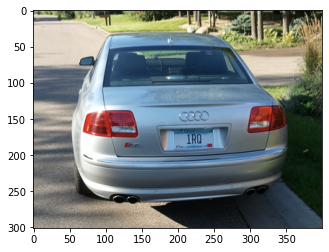

In [13]:
detected_image = get_detected_image(best_possible_plate)
plt.imshow(detected_image,cmap='gray')

In [14]:
license_text = read_license_plate(best_possible_plate)
license_text

'No License Plate Found'

<a id="chapter5" name="chapter5"></a> 

<h2 style="text-align:center">Generalized License Plate Detection</h2>

<a id="section_5_1" name="section_5_1"></a> 

<h4 style="color:#287837"><strong>Sample Detection</strong></h4>

> Perform license plate detection for the entire sample

> Save the license plate detected images in a <strong>License Plate</strong> folder

> Save a text file that detects the license plates in a <strong><i>license_plates.txt</i></strong> text file

In [15]:
from PIL import Image

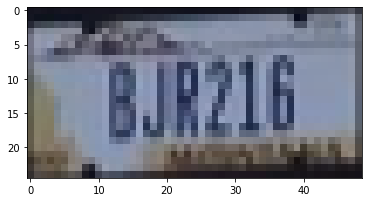

In [16]:
license_plates_textfile = open("license_text.txt","w")
title = "License Plates/License Plate: {}.png"
i = 1
for image in images:
    try:
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
        morphological_image = en.morphological_preprocessing(gray)
        morphological_contours = ld.find_license_plate_contours(morphological_image)
        best_possible_plate = ld.hyperparameter_tuning(image,gray,morphological_contours,min_aspect_ratio=min_aspect_ratio,max_aspect_ratio=max_aspect_ratio,verbose=False)
        license_text = read_license_plate(best_possible_plate)
        license_plates_textfile.writelines("{}\n".format(license_text))
        image = get_detected_image(best_possible_plate)
        cv2.imwrite(title.format(i),image)
        i+=1
    except:
        pass # doing nothing on exception


license_plates_textfile.close()    

<a id="chapter6" name="chapter6"></a> 

<h2 style="text-align:center">Conclusion</h2>

Automatic license plate detection is an underwhelmingly overlooked topic in computer vision. It is applicable in various scenarios such as security and surveillance.
It works relatively well, it cannot detect vehicles that have ventilations such as BMWs. It also struggles to detect license plates that have a black background. Surprisingly, it performs well when the license plate is far from the focal point or not in the center

[back to top](#section_n)